In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | arauca
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | curuca
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | oriximina
Processing Record 22 of Set 1 | arnes
Processing Record 23 of Set 1 | guerrero negro
Processing Record 24 of Set 1 | lebu
Processi

Processing Record 37 of Set 4 | bozeman
Processing Record 38 of Set 4 | san quintin
Processing Record 39 of Set 4 | blagoyevo
Processing Record 40 of Set 4 | shwebo
Processing Record 41 of Set 4 | krasnyy
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | trat
Processing Record 44 of Set 4 | hirado
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | adeje
Processing Record 47 of Set 4 | aguie
Processing Record 48 of Set 4 | manica
Processing Record 49 of Set 4 | noumea
Processing Record 50 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | vila
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | yeppoon
Processing Record 6 of Set 5 | champerico
Processing Record 7 of Set 5 | dudinka
Processing Record 8 of Set 5 | launceston
Processing Record 9 of Set 5 | sultanpur
Processing Record 10 of Se

Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | mbandaka
Processing Record 31 of Set 8 | kutum
Processing Record 32 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 33 of Set 8 | capaci
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | babanusah
City not found. Skipping...
Processing Record 36 of Set 8 | labuan
Processing Record 37 of Set 8 | kushmurun
Processing Record 38 of Set 8 | chhukha
City not found. Skipping...
Processing Record 39 of Set 8 | satitoa
City not found. Skipping...
Processing Record 40 of Set 8 | duldurga
Processing Record 41 of Set 8 | tiksi
Processing Record 42 of Set 8 | tulun
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | winsum
Processing Record 45 of Set 8 | norman wells
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | ozu
Processing Record 49 of Set 8 | kadoma
Processing Record 50 of Set 8 | aflu
City not 

Processing Record 11 of Set 12 | wanlaweyn
Processing Record 12 of Set 12 | kaputa
Processing Record 13 of Set 12 | safford
Processing Record 14 of Set 12 | mangan
Processing Record 15 of Set 12 | xuddur
Processing Record 16 of Set 12 | damietta
Processing Record 17 of Set 12 | diego de almagro
Processing Record 18 of Set 12 | vershino-darasunskiy
Processing Record 19 of Set 12 | wahran
City not found. Skipping...
Processing Record 20 of Set 12 | bandrele
Processing Record 21 of Set 12 | norwich
Processing Record 22 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 23 of Set 12 | kalmar
Processing Record 24 of Set 12 | frolovo
Processing Record 25 of Set 12 | gravdal
Processing Record 26 of Set 12 | saint-louis
Processing Record 27 of Set 12 | tomatlan
Processing Record 28 of Set 12 | mentok
City not found. Skipping...
Processing Record 29 of Set 12 | stornoway
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Set 12 | souillac
Processing Record 32 of Set 

In [9]:
len(city_data)

524

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,53.01,78,97,15.01,NZ,2021-01-27 22:50:07
1,Sisimiut,66.9395,-53.6735,8.10,78,0,10.94,GL,2021-01-27 22:50:08
2,Saint-Philippe,-21.3585,55.7679,77.00,69,0,5.75,RE,2021-01-27 22:50:08
3,New Norfolk,-42.7826,147.0587,59.00,54,63,1.99,AU,2021-01-27 22:50:08
4,Ushuaia,-54.8000,-68.3000,39.20,93,40,19.57,AR,2021-01-27 22:47:20
5,Mar Del Plata,-38.0023,-57.5575,66.99,59,0,11.50,AR,2021-01-27 22:50:09
6,Fort Nelson,58.8053,-122.7002,-7.60,71,40,6.91,CA,2021-01-27 22:50:09
7,Hermanus,-34.4187,19.2345,57.00,89,42,8.75,ZA,2021-01-27 22:50:09
8,Busselton,-33.6500,115.3333,53.01,83,0,1.01,AU,2021-01-27 22:50:09
9,Port Elizabeth,-33.9180,25.5701,64.40,77,0,5.75,ZA,2021-01-27 22:50:09


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
frmtd_city_data = city_data_df[new_column_order]
frmtd_city_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-27 22:50:07,-46.1927,168.8643,53.01,78,97,15.01
1,Sisimiut,GL,2021-01-27 22:50:08,66.9395,-53.6735,8.10,78,0,10.94
2,Saint-Philippe,RE,2021-01-27 22:50:08,-21.3585,55.7679,77.00,69,0,5.75
3,New Norfolk,AU,2021-01-27 22:50:08,-42.7826,147.0587,59.00,54,63,1.99
4,Ushuaia,AR,2021-01-27 22:47:20,-54.8000,-68.3000,39.20,93,40,19.57
...,...,...,...,...,...,...,...,...,...
519,Souillac,MU,2021-01-27 22:51:33,-20.5167,57.5167,73.40,88,20,8.05
520,Caravelas,BR,2021-01-27 22:51:34,-17.7125,-39.2481,76.06,81,100,5.08
521,Babusnica,RS,2021-01-27 22:51:34,43.0597,22.4117,32.00,10,98,7.18
522,Marsabit,KE,2021-01-27 22:51:34,2.3284,37.9899,67.68,57,0,8.32


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

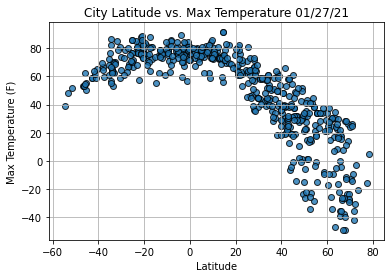

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()